# LITHO1.0 Model at 1763 K 

In [2]:
import pygmt
import pandas as pd
import utils

In [12]:
meltDf = utils.read_vtu()

In [13]:
# Adjust melt filter to change the amount of melt used for visualization
generatedMelt = meltDf[ (meltDf.MeltFraction > 0) & (meltDf.Depth >= 103) &(meltDf.Depth < 104)  ]
#generatedMelt = meltDF
generatedMelt

,Latitude,Longitude,MeltFraction,Depth
1024736,-4.000000,25.593750,0.001602,103.332649
1024739,-4.000000,25.687500,0.019346,103.332993
1024745,-3.890625,25.593750,0.000225,103.321770
1024748,-3.890625,25.687498,0.017688,103.321564
1024757,-3.781250,25.687500,0.014048,103.310776
...,...,...,...,...
7008717,8.031250,35.906250,0.079638,103.958389
7008720,8.031250,36.000004,0.079163,103.958656
7008723,8.140625,35.812500,0.080147,103.981430
7008726,8.140625,35.906250,0.079119,103.981377


### Create the Visualization

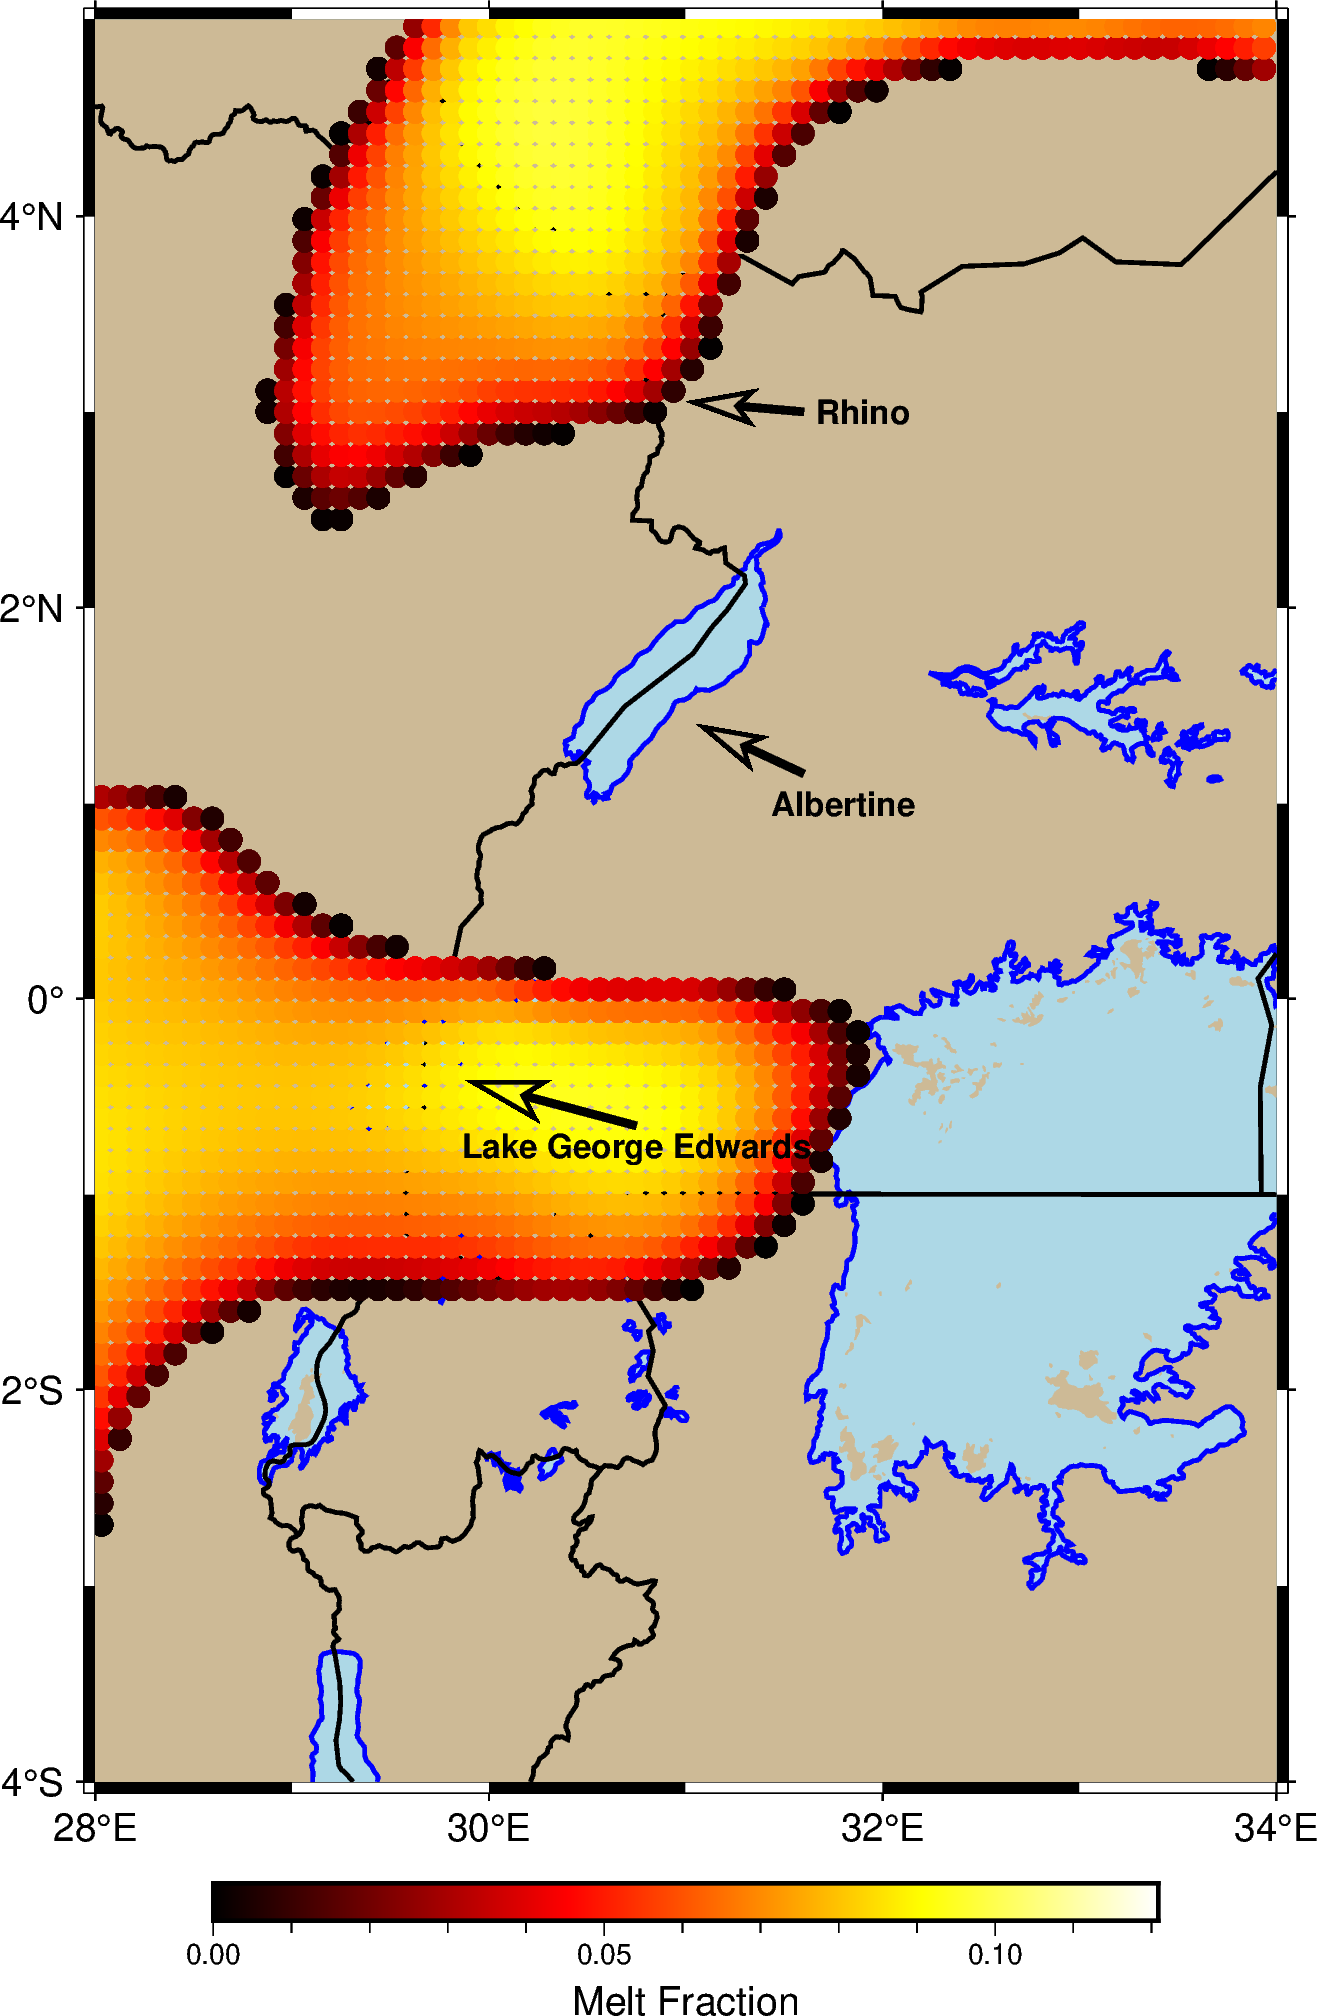

In [14]:
# Create Basemap
fig = pygmt.Figure()
fig.basemap(
    region="28/34/-4/5",
    projection="M10c",
    frame=True
)
# Add color to basemap 
fig.coast(
    land="wheat3",
    water="lightblue",
    borders="1/1p,black",
    shorelines='2/1p,blue'
)

# Creates a colorbar for melt fraction.
pygmt.makecpt(cmap="hot", series=[0, generatedMelt.MeltFraction.max()])

# Plot the melt fraction
fig.plot(x=generatedMelt.Longitude, y=generatedMelt.Latitude, style="p0.2c", fill=generatedMelt.MeltFraction, cmap=True, pen="black")
fig.text(text='Albertine', x=31.8, y=1, font="8p,Helvetica-Bold")
fig.plot(x=31.6, y=1.15, style="v0.6c+e", direction=([155], [1]), pen="2p")

fig.text(text='Rhino', x=31.9, y=3, font="8p,Helvetica-Bold")
fig.plot(x=31.6, y=3, style="v0.6c+e", direction=([175], [1]), pen="2p")

fig.text(text='Lake George Edwards', x=30.75, y=-0.75, font="8p,Helvetica-Bold")
fig.plot(x=30.75, y=-0.65, style="v0.7c+e", direction=([165], [1.5]), pen="2p")
fig.colorbar(frame="af+lMelt Fraction")
fig.show()

# Save plot as a png image
fig.savefig(fname="revised_viscosity_litho_ts11_T1763_d103_melt_fraction.png")
